In [7]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from pydub import AudioSegment
import os

ModuleNotFoundError: No module named 'librosa.load'

In [31]:
from functools import reduce

def factors(n):    
    return set(reduce(list.__add__, 
                ([i, n//i] for i in range(1, int(n**0.5) + 1) if n % i == 0)))


In [32]:
def eqSlice(song,name):
    from pydub import AudioSegment

    os.mkdir(f"../{name}")

    sound = AudioSegment.from_mp3(song)
    counter = 0
    true_factor=0
    compliment_factor=0
    factor_list=list(factors(len(sound)))
    factor_list.sort()
    factor_1_index=int(len(factor_list)/2)-1
    factor_2_index=int(len(factor_list)/2)
    factor_1=factor_list[factor_1_index]
    factor_2=factor_list[factor_2_index]
    for i in range(factor_1):
        index1=counter*factor_2
        index2 = (counter+1) * factor_2
        soundslice=sound[index1 : index2]
        counter +=1
        soundslice.export(f"../{name}/{i}.mp3", format="mp3")

In [26]:
eqSlice("../hope/hope5.mp3","hopesegs")


FileExistsError: [Errno 17] File exists: '../hopesegs'

In [3]:
def get_MFCC(sr,audio):
    
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13,  nfft=1103, appendEnergy = False)
    features = preprocessing.scale(features)
    
    return features

In [ ]:
def get_features(source):
    
    # Split files
    files = [os.path.join(source,f) for f in os.listdir(source)] #removed: if f.endswith('.wav')
    len_train = int(len(files)*0.8)
    train_files = files[:len_train]
    test_files = files[len_train:]
    
    # Train features
    features_train = []
    for f in train_files:
        sr, audio = read(f)
        #audio, sr = librosa.load(f)
        #vector = librosa.feature.mfcc(y=audio, sr=sr, n_fft=1012, hop_length=256, n_mfcc=20)
        vector = get_MFCC(sr,audio)
        if len(features_train) == 0:
            features_train = vector
        else:
            features_train = np.vstack((features_train, vector))
            
    # Test features  
    features_test = []
    for f in test_files:
        sr, audio = read(f)
        vector = get_MFCC(sr,audio)
        if len(features_test) == 0:
            features_test = vector
        else:
            features_test = np.vstack((features_test, vector))
            
    return features_train, features_test

In [10]:
#Works!
source = "../hopesegs"
features_train_hopeguy, features_test_hopeguy = get_features(source)
gmm_hopeguy = GMM(n_components = 8, max_iter = 200, covariance_type = 'diag', n_init = 3)
gmm_hopeguy.fit(features_train_hopeguy)

GaussianMixture(covariance_type='diag', max_iter=200, n_components=8, n_init=3)

In [8]:
spec = librosa.feature.melspectrogram(y=data, sr=sr)
import librosa.display
librosa.display.specshow(spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar()

NameError: name 'data' is not defined

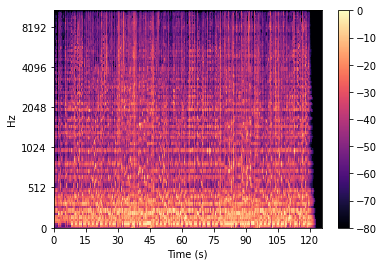

In [82]:
db_spec = librosa.power_to_db(spec, ref=np.max,)
librosa.display.specshow(db_spec,y_axis='mel', x_axis='s', sr=sr)
plt.colorbar();

In [83]:
data_h, data_p = librosa.effects.hpss(data)
spec_h = librosa.feature.melspectrogram(data_h, sr=sr)
spec_p = librosa.feature.melspectrogram(data_p, sr=sr)
db_spec_h = librosa.power_to_db(spec_h,ref=np.max)
db_spec_p = librosa.power_to_db(spec_p,ref=np.max)

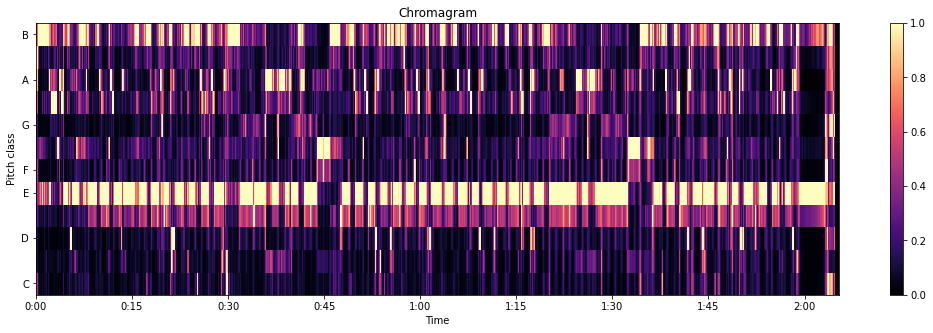

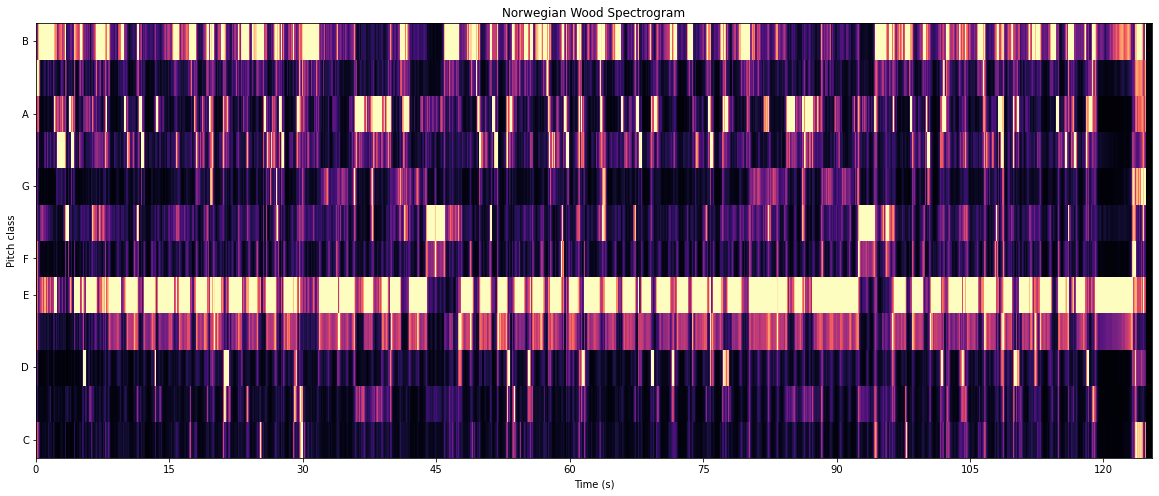

In [84]:
chroma = librosa.feature.chroma_cqt(y=data_h, sr=sr)
plt.figure(figsize=(18,5))
librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)
plt.title('Chromagram')
plt.colorbar()
plt.figure(figsize=(20,8))
plt.title('Norwegian Wood Spectrogram')
librosa.display.specshow(chroma, sr=sr, x_axis='s', y_axis='chroma', );

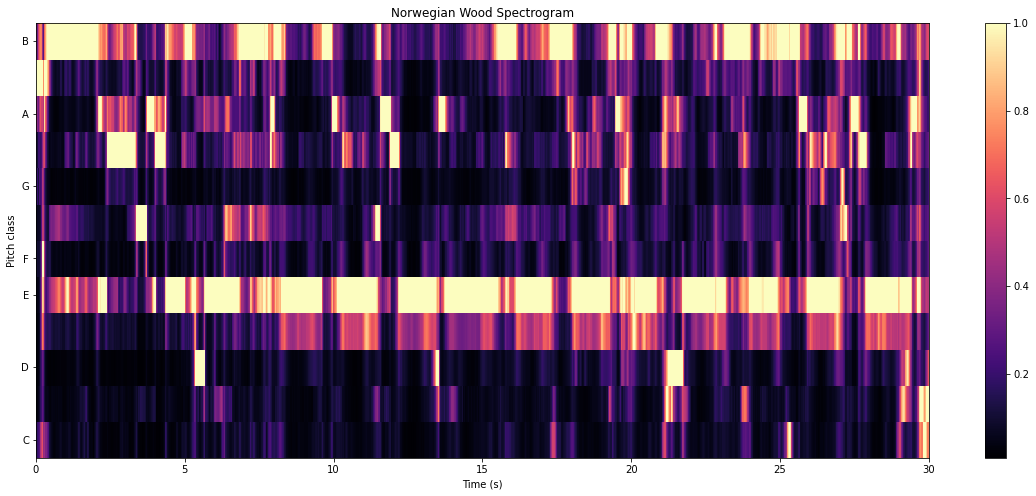

In [85]:
first_thirty_seconds = librosa.time_to_samples(30, sr=sr)
intro = data[:first_thirty_seconds]
intro_harm = librosa.effects.harmonic(intro)
intro_chroma = librosa.feature.chroma_cqt(intro_harm, sr=sr)
plt.figure(figsize=(20,8))
plt.title('Norwegian Wood Spectrogram')
librosa.display.specshow(intro_chroma, sr=sr, x_axis='s', y_axis='chroma', )
plt.colorbar();

In [86]:
print(librosa.beat.tempo(data, sr=sr))

[172.265625]


In [2]:
# Data manipulation
import numpy as np
import matplotlib.pyplot as plt

# Feature extraction
import scipy
import librosa
import python_speech_features as mfcc
import os
from scipy.io.wavfile import read

# Model training
from sklearn.mixture import GaussianMixture as GMM
from sklearn import preprocessing
import pickle

# Live recording
import sounddevice as sd
import soundfile as sf

In [8]:
import pydub 
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")

In [3]:
data, sr = librosa.load('wood.mp3')

/home/ygael/anaconda3/envs/DataViz/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


FileNotFoundError: [Errno 2] No such file or directory: 'wood.mp3'

In [92]:
get_MFCC(sr, data)

array([[-6.2580814 ,  0.90673939,  0.52712413, ...,  0.73377529,
         0.39847117,  0.73938256],
       [-6.2580814 ,  0.90673939,  0.52712413, ...,  0.73377529,
         0.39847117,  0.73938256],
       [-6.2580814 ,  0.90673939,  0.52712413, ...,  0.73377529,
         0.39847117,  0.73938256],
       ...,
       [-6.2580814 ,  0.90673939,  0.52712413, ...,  0.73377529,
         0.39847117,  0.73938256],
       [-6.2580814 ,  0.90673939,  0.52712413, ...,  0.73377529,
         0.39847117,  0.73938256],
       [-6.2580814 ,  0.90673939,  0.52712413, ...,  0.73377529,
         0.39847117,  0.73938256]])

In [2]:
get_features("tally")# Concatenation is just adding
second_half_3_times = second_half + second_half + second_half

NameError: name 'get_features' is not defined

In [12]:
#change NFFT size
newdata = librosa.feature.mfcc(import pydub 
import numpy as np

def read(f, normalized=False):
    """MP3 to numpy array"""
    a = pydub.AudioSegment.from_mp3(f)
    y = np.array(a.get_array_of_samples())
    if a.channels == 2:
        y = y.reshape((-1, 2))
    if normalized:
        return a.frame_rate, np.float32(y) / 2**15
    else:
        return a.frame_rate, y

def write(f, sr, x, normalized=False):
    """numpy array to MP3"""
    channels = 2 if (x.ndim == 2 and x.shape[1] == 2) else 1
    if normalized:  # normalized array - each item should be a float in [-1, 1)
        y = np.int16(x * 2 ** 15)
    else:
        y = np.int16(x)
    song = pydub.AudioSegment(y.tobytes(), frame_rate=sr, sample_width=2, channels=channels)
    song.export(f, format="mp3", bitrate="320k")y=data, sr=sr, n_fft=1012, hop_length=256, n_mfcc=20)

SyntaxError: invalid syntax (<ipython-input-12-f612060c9b29>, line 2)

In [ ]:
read("dream.mp3")

In [11]:
totalwar=librosa.load("war/war.mp3")

AttributeError: module 'librosa' has no attribute 'load'

In [ ]:

# len() and slicing are in milliseconds
for i in range()
halfway_point = len(sound) / 2
second_half = sound[: test point]


# writing mp3 files is a one liner
second_half.export(f"otherguy/{i}.mp3", format="mp3")

In [ ]:
len(sound)
counter=0
for i in range(0,10):
    index1=counter*644629
    index2 = (counter+1) * 644629
    soundslice=sound[index1 : index2]
    counter +=1
    soundslice.export(f"otherguy/{i}.mp3", format="mp3")



In [4]:
eqSlice("pride/pride.mp3")

In [16]:
sound = AudioSegment.from_mp3("test_slice.mp3")

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [22]:
factors(len(sound))

{1, 2, 151, 302, 599, 1198, 90449, 180898}

In [7]:
factors(4363051)

{1, 7, 11, 77, 56663, 396641, 623293, 4363051}

In [28]:

counter=0
for i in range(77):
    index1=counter*56662
    index2 = (counter+1) * 56662
    soundslice=sound[index1 : index2]
    counter +=1
    soundslice.export(f"war/sliced/warslice{i}.mp3", format="mp3")
    print([index1,index2])


[0, 56662]
[56662, 113324]
[113324, 169986]
[169986, 226648]
[226648, 283310]
[283310, 339972]
[339972, 396634]
[396634, 453296]
[453296, 509958]
[509958, 566620]
[566620, 623282]
[623282, 679944]
[679944, 736606]
[736606, 793268]
[793268, 849930]
[849930, 906592]
[906592, 963254]
[963254, 1019916]
[1019916, 1076578]
[1076578, 1133240]
[1133240, 1189902]
[1189902, 1246564]
[1246564, 1303226]
[1303226, 1359888]
[1359888, 1416550]
[1416550, 1473212]
[1473212, 1529874]
[1529874, 1586536]
[1586536, 1643198]
[1643198, 1699860]
[1699860, 1756522]
[1756522, 1813184]
[1813184, 1869846]
[1869846, 1926508]
[1926508, 1983170]
[1983170, 2039832]
[2039832, 2096494]
[2096494, 2153156]
[2153156, 2209818]
[2209818, 2266480]
[2266480, 2323142]
[2323142, 2379804]
[2379804, 2436466]
[2436466, 2493128]
[2493128, 2549790]
[2549790, 2606452]
[2606452, 2663114]
[2663114, 2719776]
[2719776, 2776438]
[2776438, 2833100]
[2833100, 2889762]
[2889762, 2946424]
[2946424, 3003086]
[3003086, 3059748]
[3059748, 311641

In [9]:
len("test.mp3")

NameError: name 'closeness' is not defined

In [15]:
eqSlice(sound)

AttributeError: 'AudioSegment' object has no attribute 'read'

In [107]:
source = "war"
features_train_war, features_test_war = get_features(source)
gmm_war = GMM(n_components = 8, max_iter = 200, covariance_type = 'diag', n_init = 3)
gmm_war.fit(features_train_me)

/home/ygael/anaconda3/envs/DataViz/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


def record_and_predict(sr=16000, channels=1, duration=3, filename='pred_record.wav'):
    
    recording = sd.rec(int(duration * sr), samplerate=sr, channels=channels).reshape(-1)
    sd.wait()
    
    features = get_MFCC(sr,recording)
    scores = None

    log_likelihood_me = np.array(gmm_male.score(features)).sum()
    log_likelihood_notme = np.array(gmm_female.score(features)).sum()

    if log_likelihood_male >= log_likelihood_female:
        return("Male")
    else:
        return("Female")

In [ ]:
counter=0
for i in range(0,8):
    soundhalved=sound
    index2 = (counter+1) * 77
    soundslice=sound[index1 : index2]
    counter +=1
    soundslice.export(f"war/sliced/warslice{i}.mp3", format="mp3")


In [22]:
factors(len(sound))

{1, 7, 11, 77, 56663, 396641, 623293, 4363051}